In [125]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [126]:
df = pd.read_csv(Path('../Resources/Income_All.csv'))
df.head()

,id,year,expenditures,expenditure_amount,income_amount
0,1,2019,Accommodation services,24927,24971
1,2,2019,Actual rentals for housing,45046,45048
2,3,2019,Alcoholic beverages,20762,20710
3,4,2019,Alcoholic beverages and tobacco,25032,25036
4,5,2019,All groups,21318,21318


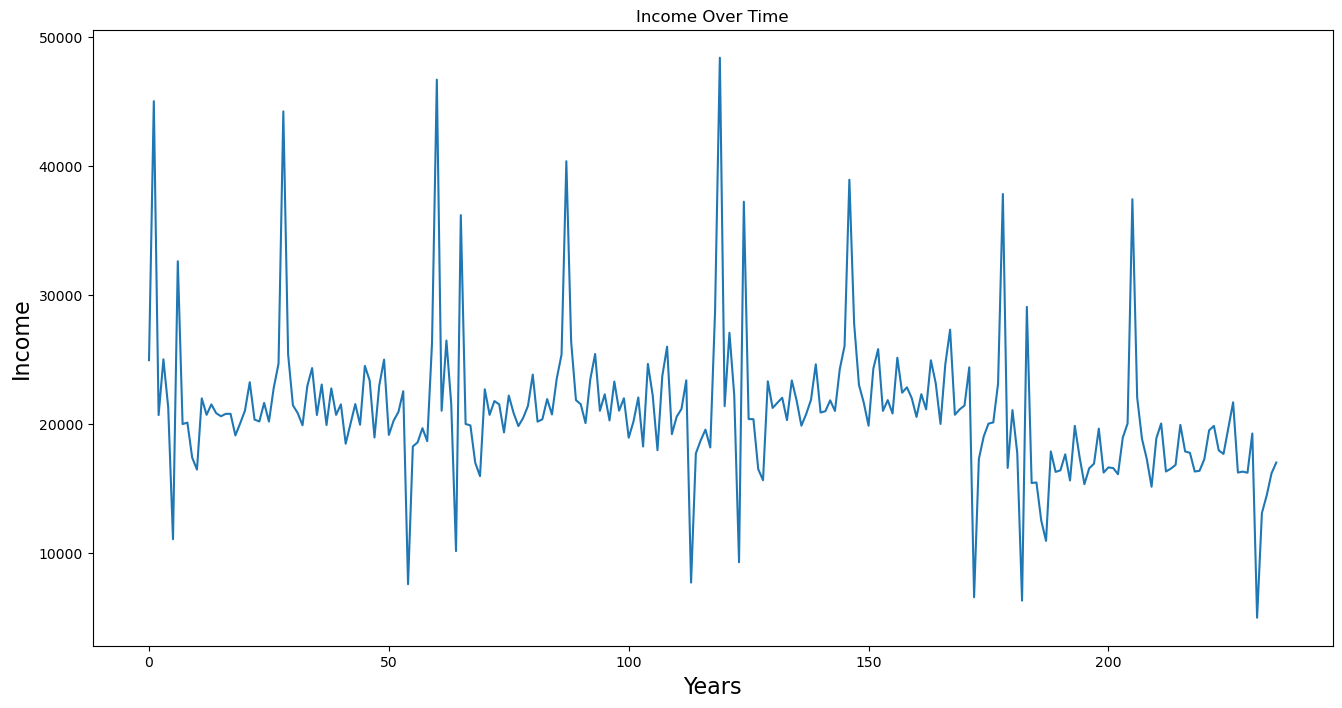

In [130]:
plt.figure(figsize=(16,8))
plt.title('Income Over Time')
plt.plot(df['income_amount'])
plt.ylabel('Income', fontsize=16)
plt.xlabel('Years',fontsize=16)
plt.show()

In [131]:
# Create a new DF with the income column
data = df.filter(['income_amount'])

# Convert the DF to a numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

189

In [132]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45997052],
       [0.92238242],
       [0.3618315 ],
       [0.46146759],
       [0.37583491],
       [0.14010318],
       [0.63653324],
       [0.34575522],
       [0.34844995],
       [0.28584919],
       [0.26452163],
       [0.391773  ],
       [0.3623382 ],
       [0.38094799],
       [0.36526325],
       [0.35978166],
       [0.36408863],
       [0.36408863],
       [0.32560228],
       [0.34695288],
       [0.36982358],
       [0.42051684],
       [0.35383942],
       [0.3504307 ],
       [0.38359666],
       [0.35031554],
       [0.41042885],
       [0.4536828 ],
       [0.9041872 ],
       [0.47017366],
       [0.37935879],
       [0.36540145],
       [0.34359022],
       [0.41369939],
       [0.44582892],
       [0.36201575],
       [0.41641715],
       [0.34409692],
       [0.40950758],
       [0.36224607],
       [0.38106315],
       [0.31072366],
       [0.34626192],
       [0.38154682],
       [0.34467272],
       [0.44974435],
       [0.42360311],
       [0.321

In [134]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the Data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.3623382 , 0.38094799, 0.36526325,
       0.35978166, 0.36408863, 0.36408863, 0.32560228, 0.34695288,
       0.36982358, 0.42051684, 0.35383942, 0.3504307 , 0.38359666,
       0.35031554, 0.41042885, 0.4536828 , 0.9041872 , 0.47017366,
       0.37935879, 0.36540145, 0.34359022, 0.41369939, 0.44582892,
       0.36201575, 0.41641715, 0.34409692, 0.40950758, 0.36224607,
       0.38106315, 0.31072366, 0.34626192, 0.38154682, 0.34467272,
       0.44974435, 0.42360311, 0.32177899, 0.41482795, 0.46091483,
       0.3264775 , 0.3520199 , 0.36756645, 0.40446359, 0.05985997,
       0.3058409 , 0.31323414, 0.33847713, 0.31526095, 0.49124787])]
[0.9607536044958312]

[array([0.45997052, 0.92238242, 0.3618315 , 0.46146759, 0.37583491,
       0.14010318, 0.63653324, 0.34575522, 0.34844995, 0.28584919,
       0.26452163, 0.391773  , 0.362

In [135]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [136]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(129, 60, 1)

In [137]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [138]:
# Complite the model
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [139]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
129/129 [==============================] - 7s 22ms/step - loss: 0.0246
Epoch 2/100
129/129 [==============================] - 2s 18ms/step - loss: 0.0222
Epoch 3/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0232
Epoch 4/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0211
Epoch 5/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0229
Epoch 6/100
129/129 [==============================] - 2s 16ms/step - loss: 0.0206
Epoch 7/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0224
Epoch 8/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0207
Epoch 9/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0201
Epoch 10/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0208
Epoch 11/100
129/129 [==============================] - 2s 18ms/step - loss: 0.0206
Epoch 12/100
129/129 [==============================] - 3s 20ms/step - loss: 0.0202
E

129/129 [==============================] - 2s 13ms/step - loss: 0.0083
Epoch 99/100
129/129 [==============================] - 2s 16ms/step - loss: 0.0075
Epoch 100/100
129/129 [==============================] - 2s 17ms/step - loss: 0.0071


In [144]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [145]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [146]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [147]:
# Get the models predicted income
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 12ms/step


In [148]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2620.9912109375

C:\Users\Logan\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


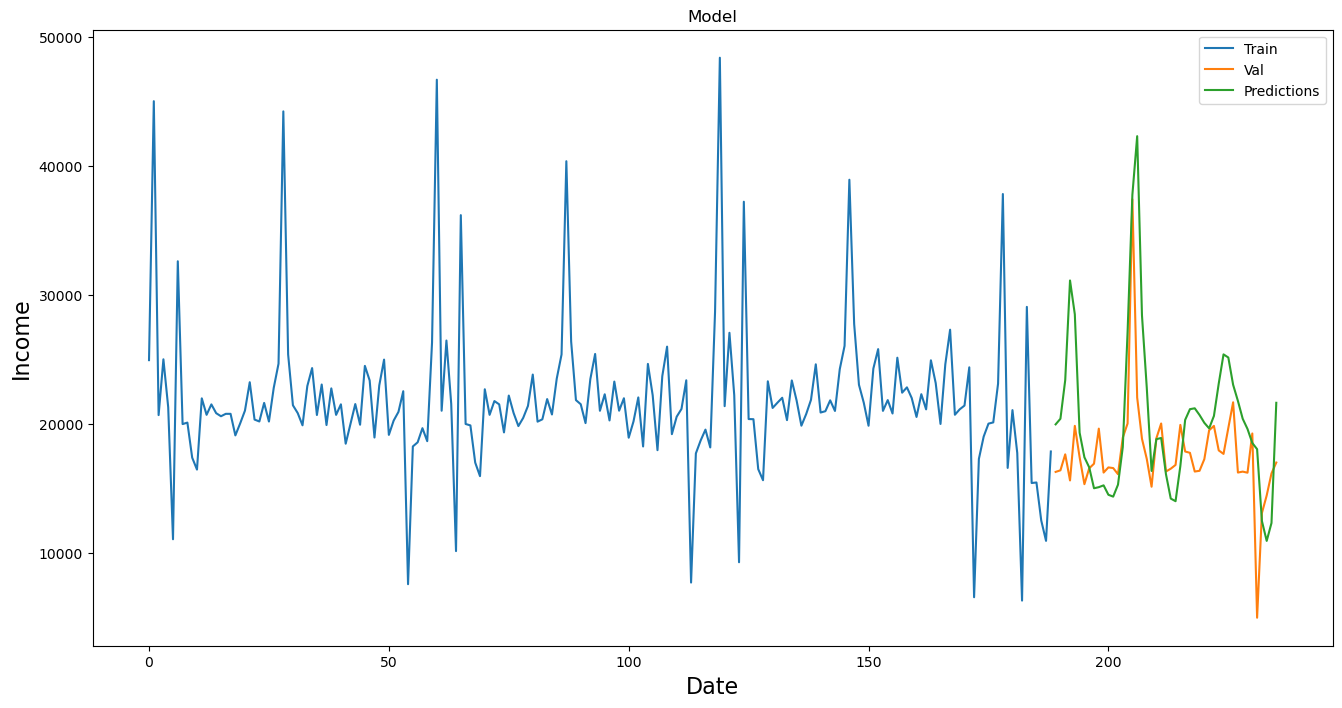

In [149]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the Data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Income', fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.plot(train['income_amount'])
plt.plot(valid[['income_amount', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [150]:
# Show the valid and predicted incomes
valid

,income_amount,Predictions
189,16305,19992.242188
190,16428,20427.000000
191,17667,23422.755859
192,15644,31147.763672
193,19875,28525.796875
194,17443,19345.947266
195,15354,17437.355469
196,16585,16658.417969
197,16942,15037.615234
198,19660,15122.172852
